In [135]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import torch

import sys
sys.path.insert(0, '../fem')
from hc2d import *
from randompolynomials import *
from GRF import *
from datasaver import *

sys.path.insert(0, '../ml')
from modelloader import loadmodelfromlabel
from VarMiON import VarMiON
from NGO import NGO

In [136]:
%load_ext autoreload
%autoreload 2

In [177]:
simparams = {'d': 2,
             'nelems': 32,
             'etype': 'square',
             'btype': 'spline',
             'basisdegree': 1,
             'intdegree': 2,
             'nfemsamples': 2}

p_theta = {'l_min': 0.4,
           'l_max': 0.4,
           'lowerbound': 0.5,
           'upperbound': 0.99}

p_f = {'l_min': 0.2,
       'l_max': 0.2,
       'lowerbound': 0.02,
       'upperbound': 0.99}

p_eta = {'l_min': 0.3,
         'l_max': 0.3,
         'lowerbound': -1,
         'upperbound': 1}

inputdataparams = {'theta': p_theta,
          'f': p_f,
          'eta': p_eta}

trainingdataparams = {'N_samples': 20}

params = {}
params['simparams'] = simparams
params['inputdataparams'] = inputdataparams
params['trainingdataparams'] = trainingdataparams

thetaset = GRFset(**simparams, **trainingdataparams, **inputdataparams['theta'])
fset = GRFset(**simparams, **trainingdataparams, **inputdataparams['f'])
etabset = GRFset(**simparams, **trainingdataparams, **inputdataparams['eta'])
etatset = GRFset(**simparams, **trainingdataparams, **inputdataparams['eta'])
gl = 0
gr = 0

In [178]:
u_array = []

for i in range(trainingdataparams['N_samples']):
    
    print(i)
    
    inputs = {'theta': thetaset.grfs_nutils[i],
              'f': fset.grfs_nutils[i],
              'etab': etabset.grfs_nutils[i],
              'etat': etatset.grfs_nutils[i],
              'gl': 0,
              'gr': 0}

    x, u = main(**simparams, **trainingdataparams, **inputs)
    
    u_array.append(u)

0
optimize > constrained 66/1089 dofs
optimize > optimum value 0.00e+00
solve > solving 1023 dof system to machine precision using arnoldi solver
solve > solver returned with residual 9e-16
1
optimize > constrained 66/1089 dofs
optimize > optimum value 0.00e+00
solve > solving 1023 dof system to machine precision using arnoldi solver
solve > solver returned with residual 4e-16
2
optimize > constrained 66/1089 dofs
optimize > optimum value 0.00e+00
solve > solving 1023 dof system to machine precision using arnoldi solver
solve > solver returned with residual 3e-16
3
optimize > constrained 66/1089 dofs
optimize > optimum value 0.00e+00
solve > solving 1023 dof system to machine precision using arnoldi solver
solve > solver returned with residual 1e-15
4
optimize > constrained 66/1089 dofs
optimize > optimum value 0.00e+00
solve > solving 1023 dof system to machine precision using arnoldi solver
solve > solver returned with residual 6e-16
5
optimize > constrained 66/1089 dofs
optimize > o

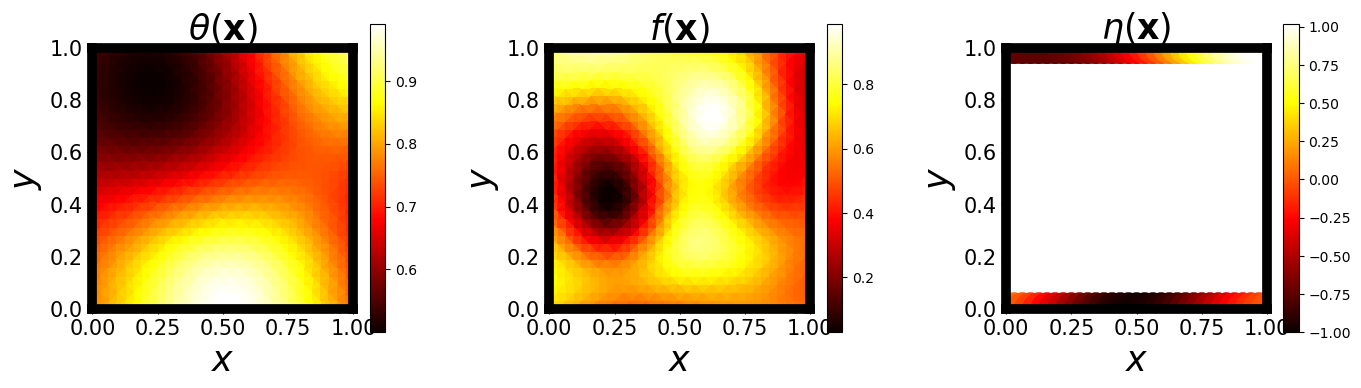

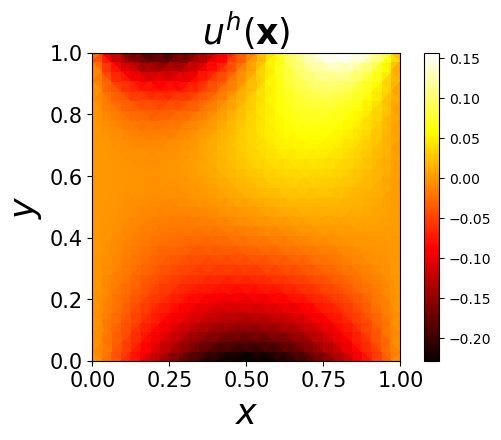

In [253]:
i=4

#plot
fig, axs = plt.subplots(1,3, figsize=(16, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.2)
size_title = 25
size_ticklabels = 15
size_axeslabels = 25
box_lw = 7

ax = axs[0]
plot0 = ax.tripcolor(x[:,0], x[:,1], thetaset.grfs_ngo[i](x), cmap='hot')
ax.set_title(r"$\theta(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);
fig.colorbar(plot0, ax=ax)

ax = axs[1]
plot1 = ax.tripcolor(x[:,0], x[:,1], fset.grfs_ngo[i](x), cmap='hot')
ax.set_title(r"$f(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);
fig.colorbar(plot1, ax=ax)

ax = axs[2]

# ax.plot(x[x[:,1]==0,0], etabset.grfs_ngo[i](x)[x[:,1]==0], label=r'$\eta_\mathrm{bottom}(x)$', linewidth=3)
# ax.plot(x[x[:,1]==1,0], etatset.grfs_ngo[i](x)[x[:,1]==1], label=r'$\eta_\mathrm{top}(x)$', linewidth=3)
# ax.set_title(r"$\eta(\mathbf{x})$", fontsize=size_title)
# ax.tick_params(axis='both', labelsize=size_ticklabels)
# ax.ticklabel_format(style='sci', scilimits=[-3,3])
# ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
# ax.set_ylabel(r'$\eta(x)$', fontsize=size_axeslabels)
# # ax.set_xlim(0,1)
# ax.legend(fontsize=16)
# # ax.set_box_aspect(1)
# ax.grid()

ax.set_title(r"$\eta(\mathbf{x})$", fontsize=size_title)
vmin = min(np.amin(etabset.grfs_ngo[i](x)),np.amin(etatset.grfs_ngo[i](x)))
vmax = max(np.amax(etabset.grfs_ngo[i](x)),np.amax(etatset.grfs_ngo[i](x)))
fig = ax.scatter(x[x[:,1]==0,0], x[x[:,1]==0,1], c=etabset.grfs_ngo[i](x)[x[:,1]==0], label=r'$\eta_\mathrm{bottom}(x)$', s=500, cmap='hot', vmin=vmin, vmax=vmax)
fig = ax.scatter(x[x[:,1]==1,0], x[x[:,1]==1,1], c=etatset.grfs_ngo[i](x)[x[:,1]==1], label=r'$\eta_\mathrm{top}(x)$', s=500, cmap='hot', vmin=vmin, vmax=vmax)
# ax.set_title(r"$\eta(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
# ax.legend(fontsize=20)
ax.set_box_aspect(1)
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);
plt.colorbar(fig)
# ax.grid()

plt.savefig("hc2d_theta_f_eta.svg", bbox_inches='tight', transparent=True)

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.tripcolor(x[:,0], x[:,1], u_array[i], cmap='hot')
ax.set_title(r"$u^h(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

# plt.savefig("hc2d_u.pdf", bbox_inches='tight')

In [248]:
from VarMiON import VarMiON
from RegularNN import RegularNN
from NGO import NGO

logdir = '../../../nnlogs'
sublogdir = 'NGO_theta05'
map_location = 'cpu'

model = loadmodelfromlabel(model=NGO, label='halfprecision', logdir=logdir, sublogdir=sublogdir, map_location=map_location)

0.057912687464246056


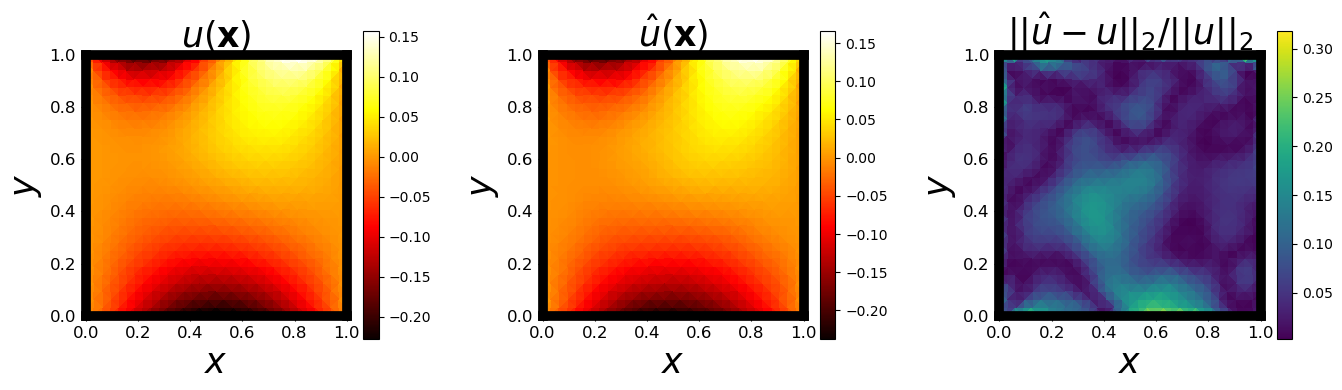

In [255]:
i=4
theta = thetaset.grfs_ngo[i]
f = fset.grfs_ngo[i]
etab = etabset.grfs_ngo[i]
etat = etatset.grfs_ngo[i]

u_hat = model.simforward(theta, f, etab, etat, x)
# u_hat = model.simforward(Theta, F, N, x).detach().numpy()

# mus = model.mus[0].detach().numpy()
# sigmas = torch.exp(model.log_sigmas[0]).detach().numpy()

#plot
fig, axs = plt.subplots(1,3, figsize=(16, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.2)
size_title = 25
size_ticklabels = 12
size_axeslabels = 25
box_lw = 7

ax = axs[0]
fig = ax.tripcolor(x[:,0], x[:,1], u_array[i], cmap='hot')
ax.set_title(r"$u(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);
plt.colorbar(fig)

ax = axs[1]
fig = ax.tripcolor(x[:,0], x[:,1], u_hat, cmap='hot', vmin=np.amin(u_array[i]), vmax=np.amax(u_array[i]))
# for i in range(72):
#     ax.scatter(mus[i,0], mus[i,1], s=50, alpha=0.5, color='blue')
#     ax.scatter(mus[i,0], mus[i,1], s=10000*sigmas[i], alpha=0.1, color='C0')
ax.set_title(r"$\hat{u}(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);
plt.colorbar(fig)

ax = axs[2]
fig = ax.tripcolor(x[:,0], x[:,1], np.sqrt((u_hat - u_array[i])**2)/np.average(np.sqrt(u_array[i]**2)))#, norm=matplotlib.colors.LogNorm())
ax.set_title(r"$||\hat{u} - {u}||_{2}/||u||_{2}$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);
plt.colorbar(fig)

plt.savefig("NGOprediction.svg", bbox_inches='tight', transparent=True)

L2 = np.average(np.sqrt((u_hat - u_array[i])**2))
L2_scaled = L2/np.average(np.sqrt(u_array[i]**2))
print(L2_scaled)
# APE = np.abs((u_hat - u)/u)
# APE[APE==np.inf] = np.nan
# MAPE = np.nanmean(APE)
# print('MAPE: '+(str(MAPE)))
# # plt.savefig("nonzeroN.pdf", bbox_inches='tight')

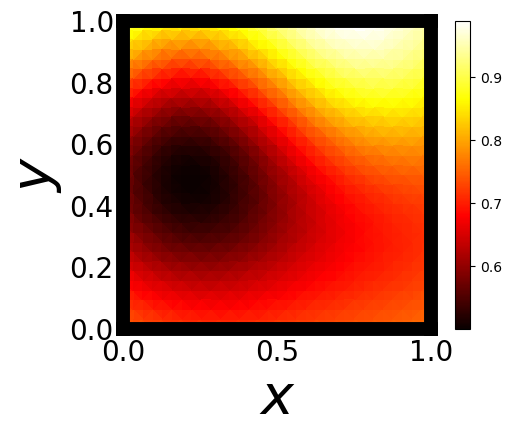

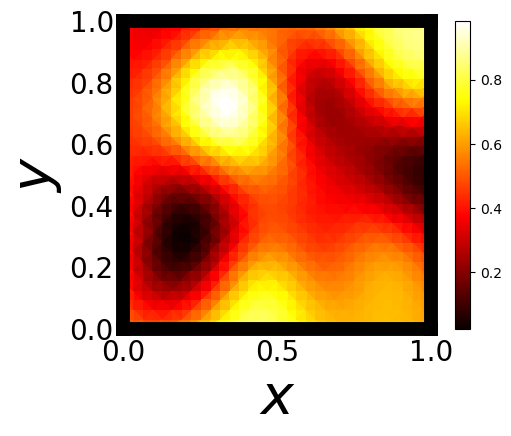

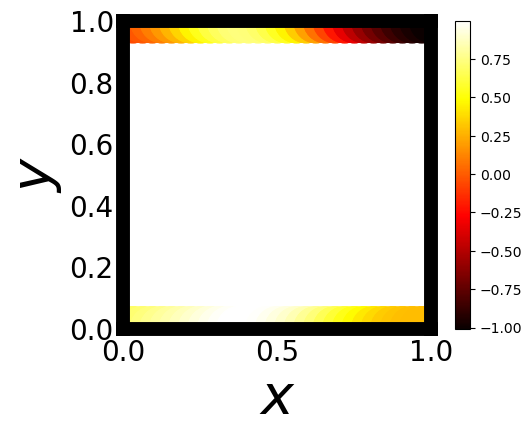

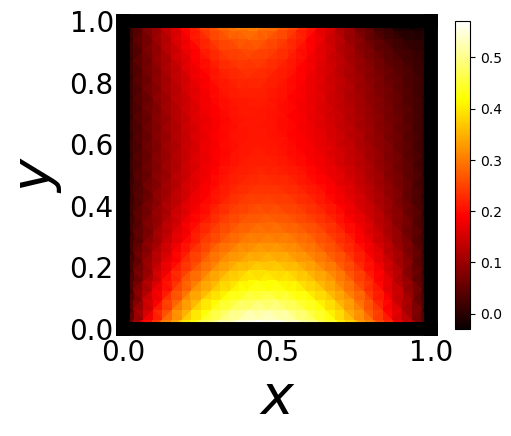

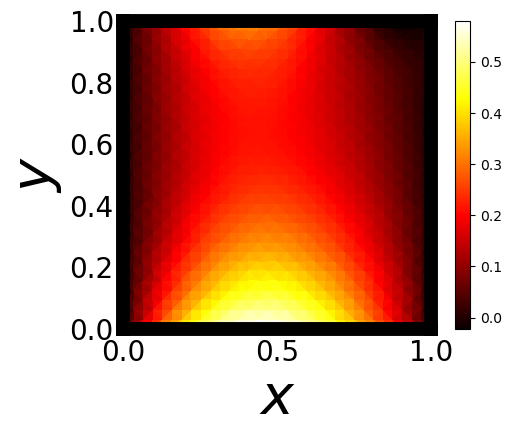

In [77]:
size_title = 25
size_ticklabels = 20
size_axeslabels = 40
box_lw = 10

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

plot0 = ax.tripcolor(x[:,0], x[:,1], thetaset.grfs_ngo[i](x), cmap='hot')
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot0, ax=ax)

plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);

plt.savefig("theta.svg", bbox_inches='tight', transparent=True)


fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

plot0 = ax.tripcolor(x[:,0], x[:,1], fset.grfs_ngo[i](x), cmap='hot')
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot0, ax=ax)

plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);

plt.savefig("f.svg", bbox_inches='tight', transparent=True)


fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

vmin = min(np.amin(etabset.grfs_ngo[i](x)),np.amin(etatset.grfs_ngo[i](x)))
vmax = max(np.amax(etabset.grfs_ngo[i](x)),np.amax(etatset.grfs_ngo[i](x)))
fig = ax.scatter(x[x[:,1]==0,0], x[x[:,1]==0,1], c=etabset.grfs_ngo[i](x)[x[:,1]==0], label=r'$\eta_\mathrm{bottom}(x)$', s=1000, cmap='hot', vmin=vmin, vmax=vmax)
fig = ax.scatter(x[x[:,1]==1,0], x[x[:,1]==1,1], c=etatset.grfs_ngo[i](x)[x[:,1]==1], label=r'$\eta_\mathrm{top}(x)$', s=1000, cmap='hot', vmin=vmin, vmax=vmax)
# ax.set_title(r"$\eta(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
# ax.legend(fontsize=20)
ax.set_box_aspect(1)
plt.colorbar(fig)
# ax.grid()

plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1)

plt.savefig("eta.svg", bbox_inches='tight', transparent=True)


fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

plot0 = ax.tripcolor(x[:,0], x[:,1], u_array[i], cmap='hot')
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot0, ax=ax)

plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);

plt.savefig("u.svg", bbox_inches='tight', transparent=True)


fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

plot0 = ax.tripcolor(x[:,0], x[:,1], u_hat, cmap='hot')
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot0, ax=ax)

plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);

plt.savefig("u_hat.svg", bbox_inches='tight', transparent=True)

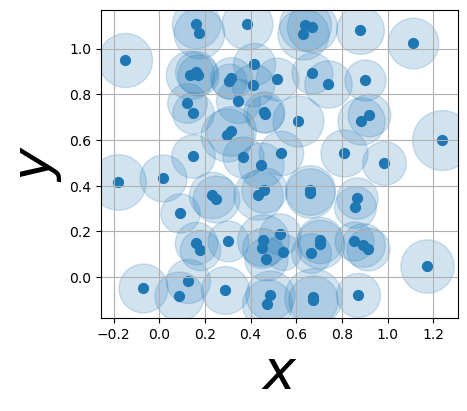

In [78]:
size_title = 25
size_ticklabels = 10
size_axeslabels = 40

mus = model.Trunk_trial.mus.detach().numpy()
sigmas = torch.exp(model.Trunk_trial.log_sigmas).detach().numpy()

# mus = model.mus[0].detach().numpy()
# sigmas = torch.exp(model.log_sigmas[0]).detach().numpy()

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

for i in range(72):
    ax.scatter(mus[i,0], mus[i,1], s=50, alpha=1, color='C0', label='NGO')
    ax.scatter(mus[i,0], mus[i,1], s=10000*sigmas[i], alpha=0.2, color='C0')
# ax.set_title(r"$\hat{\Theta}_j=\theta(\mathbf{x}_j)$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_aspect('equal')
# ax.set_xlim(-0.5,1.5)
# ax.set_ylim(-0.5,1.5)
# ax.set_xlim(0,1)
# ax.set_ylim(0,1)
ax.grid()
# ax.legend(fontsize=12)

# plt.savefig("phis_boundedcenters_normbasis.svg", bbox_inches='tight')#, transparent=True)

In [79]:
x = torch.linspace(0,1,100)
y = torch.zeros(100)
x = torch.vstack([x,y]).T
phi = model.Trunk(x[:None,None,:]).squeeze()

AttributeError: 'NGO' object has no attribute 'Trunk'

In [ ]:
D = model.NLBranch.forward(torch.ones((1,12,12), dtype=model.dtype)).squeeze()

In [26]:
plt.imshow(D.detach().numpy())
plt.colorbar()

NameError: name 'D' is not defined

In [27]:
G = torch.einsum('mi,ij,nj->mn', phi, D, phi).detach().numpy()
plt.imshow(G)
plt.colorbar()

NameError: name 'phi' is not defined

### Test score VarMiON

In [229]:
#Test dataset
N_samples = 1000
Theta_test = torch.tensor(np.load('../../../trainingdata/grf/fixedl_positivef/test/Theta.npy'))[:N_samples]
F_test = torch.tensor(np.load('../../../trainingdata/grf/fixedl_positivef/test/F.npy'))[:N_samples]
N_test = torch.tensor(np.load('../../../trainingdata/grf/fixedl_positivef/test/N.npy'))[:N_samples]
x_test = torch.tensor(np.load('../../../trainingdata/grf/fixedl_positivef/test/x.npy'))[:N_samples]
u_test = torch.tensor(np.load('../../../trainingdata/grf/fixedl_positivef/test/u.npy'))[:N_samples]

In [230]:
u_test.shape

torch.Size([1000, 268])

In [231]:
from VarMiON import VarMiON
from RegularNN import RegularNN

model = RegularNN
logdir = '../../../nnlogs'
sublogdir = 'grf'
map_location = 'cpu'
RegularNN = loadmodelfromlabel(model=RegularNN, label='RegularNN', logdir=logdir, sublogdir=sublogdir, map_location=map_location)

model = VarMiON
logdir = '../../../nnlogs'
sublogdir = 'grf3'
map_location = 'cpu'

# noLBbias = loadmodelfromlabel(model=model, label='noLBbias', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
# noNLBoutputactivation = loadmodelfromlabel(model=model, label='noNLBoutputactivation', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
# PosDefSymD = loadmodelfromlabel(model=model, label='SymPosDefD', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
# scale_invariant = loadmodelfromlabel(model=model, label='scale_invariant', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
# norm_basis = loadmodelfromlabel(model=model, label='norm_basis', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
# oneovertheta = loadmodelfromlabel(model=model, label='1overtheta', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
tanhshrink = loadmodelfromlabel(model=model, label='tanhshrink', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
# boundedcenters = loadmodelfromlabel(model=model, label='boundedcenters', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
# symgroupavg = loadmodelfromlabel(model=model, label='symgroupavg', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
allchanges = loadmodelfromlabel(model=model, label='allchanges_new', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
# VarMiON = loadmodelfromlabel(model=model, label='VarMiON', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
# NOMAD_dot = loadmodelfromlabel(model=model, label='NOMAD_dot', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
# NOMAD_allchanges = loadmodelfromlabel(model=model, label='NOMAD_allchanges', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
allchanges_new = loadmodelfromlabel(model=VarMiON, label='allchanges_new', logdir=logdir, sublogdir=sublogdir, map_location=map_location)

modeldict = {'Naive NN': RegularNN,
             'VarMiON': VarMiON,
             # 'VarMiON+': allchanges,
             #'No bias': noLBbias,
             #'noNLBoutputactivation': noNLBoutputactivation,
            #'SymPosDefD': PosDefSymD,
             #'Scale invariant': scale_invariant,
             #'Normalized basis': norm_basis,
             #'VarMiON': tanhshrink}#,
             #'1overtheta': oneovertheta,
             #'boundedcenters': boundedcenters,
             # 'NOMAD': NOMAD_dot,
             # 'NOMAD+': NOMAD_allchanges}
             'Extended VarMiON': allchanges_new}

KeyError: 'h'

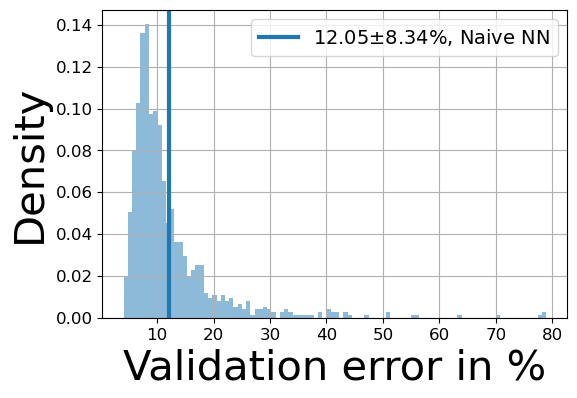

In [7]:
size_title = 20
size_ticklabels = 12
size_axeslabels = 30

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']
L2_scaled_avgs = []
i=0
for model in modeldict:
    if modeldict[str(model)].params['hparams']['symgroupavg']==True:
        u_hat = modeldict[str(model)].symgroupavg_forward(Theta_test, F_test, N_test, x_test).detach().numpy()
    else:
        u_hat = modeldict[str(model)].forward(Theta_test, F_test, N_test, x_test).detach().numpy()
    L2 = np.average(np.sqrt((u_hat - u_test.detach().numpy())**2), axis=-1)
    L2_scaled = L2/np.average(np.sqrt((u_test.detach().numpy())**2), axis=-1)
    # APE[np.abs(u_test)<1e-4] = np.nan
    # MAPE = np.nanmean(APE, axis=-1)
    L2_scaled_avg = np.average(L2_scaled)
    sigma = np.std(L2_scaled)
    ax.hist(100*L2_scaled, bins=100, density=True, alpha=0.5, linewidth=1, color=colors[i], histtype='bar')
    ax.axvline(100*L2_scaled_avg, 0, 1, linewidth=3, color=colors[i], label=str(np.around(100*L2_scaled_avg, 2))+r'$\pm$'+str(np.around(100*sigma, 2))+'%, '+str(model))
    i+=1
    L2_scaled_avgs.append(L2_scaled_avg)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(0,15)
ax.legend(fontsize=14)
ax.tick_params(axis='both', labelsize=size_ticklabels)
# ax.ticklabel_format(style='sci', scilimits=[-3,3])
# ax.set_xlabel(r'$\langle|(\hat{u} - u^h)/u^h|\rangle$', fontsize=size_axeslabels)
ax.set_xlabel(r'Validation error in %', fontsize=size_axeslabels)
ax.set_ylabel(r'Density', fontsize=size_axeslabels)
ax.grid()
plt.savefig("NaiveNN.svg", bbox_inches='tight')#, transparent=True)

L2_scaled_avgs = np.array(L2_scaled_avgs)
L2_scaled_avg_avg = np.average(L2_scaled_avgs)
std_L2_scaled_avg = np.std(L2_scaled_avgs)
# print(100*L2_scaled_avg_avg)
# print(100*np.amin(L2_scaled_avgs))
# print(100*np.amax(L2_scaled_avgs))
# print(100*std_L2_scaled_avg)

## Test score NGO

In [239]:
from VarMiON import VarMiON
from RegularNN import RegularNN
from NGO import NGO

logdir = '../../../nnlogs'
sublogdir = 'NGO_theta05'
map_location = 'cpu'

varmion = loadmodelfromlabel(model=NGO, label='VarMiON_papersettings_halfprecision', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
ngo = loadmodelfromlabel(model=NGO, label='halfprecision', logdir=logdir, sublogdir=sublogdir, map_location=map_location) 

modeldict = {'VarMiON': varmion,
            'NGO': ngo}

In [240]:
idx = np.linspace(0,4095, 4096)
ridx = np.random.choice(idx, 268, replace=False)

In [241]:
#Test dataset
N_samples = 1000
theta_test = load_function_list('theta', '../../../trainingdata/HC2D_NGO_VarMiONpapersettings/test')[:N_samples]
f_test = load_function_list('f', '../../../trainingdata/HC2D_NGO_VarMiONpapersettings/test')[:N_samples]
etab_test = load_function_list('etab', '../../../trainingdata/HC2D_NGO_VarMiONpapersettings/test')[:N_samples]
etat_test = load_function_list('etat', '../../../trainingdata/HC2D_NGO_VarMiONpapersettings/test')[:N_samples]
x_test = torch.tensor(np.load('../../../trainingdata/HC2D_NGO_VarMiONpapersettings/test/x.npy'))[:N_samples]
u_test = torch.tensor(np.load('../../../trainingdata/HC2D_NGO_VarMiONpapersettings/test/u.npy'))[:N_samples]

In [242]:
u_test = u_test[:,ridx]

In [245]:
u_hat = np.zeros((1000,4096))
for i in range(1000):
    print
    u_hat[i] = ngo.simforward(theta_test[i], f_test[i], etab_test[i], etat_test[i], x_test[i])
u_hat = torch.tensor(u_hat)
u_hat = u_hat[:,ridx]

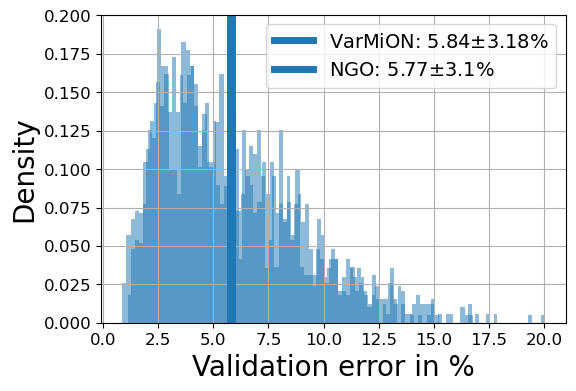

In [246]:
size_title = 20
size_ticklabels = 12
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']
L2_scaled_avgs = []
i=0
L2 = np.average(np.sqrt((u_hat - u_test.detach().numpy())**2), axis=-1)
L2_scaled = L2/np.average(np.sqrt((u_test.detach().numpy())**2), axis=-1)
# APE[np.abs(u_test)<1e-4] = np.nan
# MAPE = np.nanmean(APE, axis=-1)
L2_scaled_avg = np.average(L2_scaled)
sigma = np.std(L2_scaled)
ax.hist(100*L2_scaled_v, bins=100, density=True, alpha=0.5, linewidth=1, color=colors[0], histtype='bar')
ax.axvline(100*L2_scaled_avg_v, 0, 1, linewidth=5, color=colors[0], label="VarMiON: "+str(np.around(100*L2_scaled_avg_v, 2))+r'$\pm$'+str(np.around(100*sigma_v, 2))+'%')
ax.hist(100*L2_scaled, bins=100, density=True, alpha=0.5, linewidth=1, color=colors[0], histtype='bar')
ax.axvline(100*L2_scaled_avg, 0, 1, linewidth=5, color=colors[0], label="NGO: "+str(np.around(100*L2_scaled_avg, 2))+r'$\pm$'+str(np.around(100*sigma, 2))+'%')
i+=1
L2_scaled_avgs.append(L2_scaled_avg)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(0,15)
ax.legend(fontsize=14)
ax.tick_params(axis='both', labelsize=size_ticklabels)
# ax.ticklabel_format(style='sci', scilimits=[-3,3])
# ax.set_xlabel(r'$\langle|(\hat{u} - u^h)/u^h|\rangle$', fontsize=size_axeslabels)
ax.set_xlabel(r'Validation error in %', fontsize=size_axeslabels)
ax.set_ylabel(r'Density', fontsize=size_axeslabels)
ax.grid()
plt.savefig("NGO.svg", bbox_inches='tight')#, transparent=True)

L2_scaled_avgs = np.array(L2_scaled_avgs)
L2_scaled_avg_avg = np.average(L2_scaled_avgs)
std_L2_scaled_avg = np.std(L2_scaled_avgs)
# print(100*L2_scaled_avg_avg)
# print(100*np.amin(L2_scaled_avgs))
# print(100*np.amax(L2_scaled_avgs))
# print(100*std_L2_scaled_avg)

In [ ]:
simparams = {'d': 2,
             'nelems': 100,
             'etype': 'square',
             'btype': 'spline',
             'basisdegree': 1,
             'intdegree': 2,
             'nfemsamples': 2}

trainingdataparams = {'N_samples': 100}

alpha = 0.05
q_low = alpha/2
q_high = 1 - q_low

l = np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1])
L2_scaled_avg = np.zeros(len(l))
yerr = np.zeros((2,len(l)))

size_title = 20
size_ticklabels = 12
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

for model in modeldict:
        
    for i in range(len(l)):

        p_theta = {'l_min': l[i],
                   'l_max': l[i],
                   'lowerbound': 0.5,
                   'upperbound': 0.99}

        p_f = {'l_min': l[i],
               'l_max': l[i],
               'lowerbound': 0.02,
               'upperbound': 0.99}

        p_eta = {'l_min': l[i],
                 'l_max': l[i],
                 'lowerbound': -1,
                 'upperbound': 1}

        inputdataparams = {'theta': p_theta,
                  'f': p_f,
                  'eta': p_eta}

        params = {}
        params['simparams'] = simparams
        params['inputdataparams'] = inputdataparams
        params['trainingdataparams'] = trainingdataparams

        thetaset = GRFset(**simparams, **trainingdataparams, **inputdataparams['theta'])
        fset = GRFset(**simparams, **trainingdataparams, **inputdataparams['f'])
        etabset = GRFset(**simparams, **trainingdataparams, **inputdataparams['eta'])
        etatset = GRFset(**simparams, **trainingdataparams, **inputdataparams['eta'])
        gl = 0
        gr = 0
        
        L2_scaled_array = []

        for j in range(trainingdataparams['N_samples']):
            
            inputs = {'theta': thetaset.grfs_nutils[j],
                      'f': fset.grfs_nutils[j],
                      'etab': etabset.grfs_nutils[j],
                      'etat': etatset.grfs_nutils[j],
                      'gl': 0,
                      'gr': 0}

            x, u = main(**simparams, **trainingdataparams, **inputs)
            u_hat = modeldict[str(model)].simforward(thetaset.grfs_ngo[j], fset.grfs_ngo[j], etabset.grfs_ngo[j], etatset.grfs_ngo[j], x)

            L2 = np.average(np.sqrt((u_hat - u)**2), axis=-1)
            L2_scaled = L2/np.average(np.sqrt((u)**2), axis=-1)
            L2_scaled_array.append(L2_scaled)
        
        L2_scaled_array = np.array(L2_scaled_array)
        L2_scaled_avg[i] = np.average(L2_scaled_array)
        q_l = np.quantile(L2_scaled_array, q_low)
        q_h = np.quantile(L2_scaled_array, q_high)
        yerr[:,i] = np.array([L2_scaled_avg[i] - q_l, -L2_scaled_avg[i] + q_h])

    ax.errorbar(l, L2_scaled_avg, yerr=yerr, fmt=".-", capsize=6, ms=15, label=str(model))
        
ax.legend(fontsize=14)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.set_xlabel(r'$l$', fontsize=size_axeslabels)
ax.set_ylabel(r'$\frac{||\hat{u}-u||_2}{||u||_2}$', fontsize=size_axeslabels)
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid()
plt.savefig("errorvsl.svg", bbox_inches='tight')#, transparent=True)

plt.legend()
plt.show()

optimize > constrained 66/1089 dofs
optimize > optimum value 0.00e+00
solve > solving 1023 dof system to machine precision using arnoldi solver
solve > solver returned with residual 5e-16
optimize > constrained 66/1089 dofs
optimize > optimum value 0.00e+00
solve > solving 1023 dof system to machine precision using arnoldi solver
solve > solver returned with residual 3e-16
optimize > constrained 66/1089 dofs
optimize > optimum value 0.00e+00
solve > solving 1023 dof system to machine precision using arnoldi solver
solve > solver returned with residual 6e-16
optimize > constrained 66/1089 dofs
optimize > optimum value 0.00e+00
solve > solving 1023 dof system to machine precision using arnoldi solver
solve > solver returned with residual 6e-16
optimize > constrained 66/1089 dofs
optimize > optimum value 0.00e+00
solve > solving 1023 dof system to machine precision using arnoldi solver
solve > solver returned with residual 6e-16
optimize > constrained 66/1089 dofs
optimize > optimum value

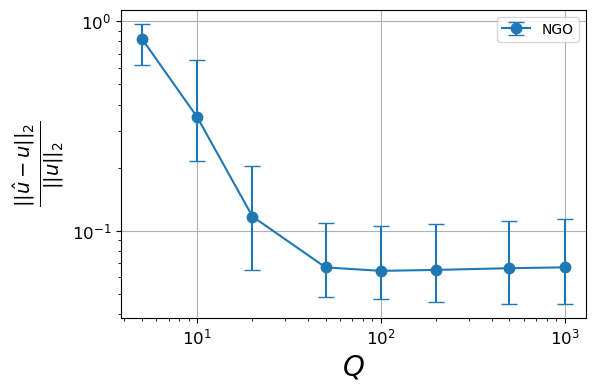

In [18]:
modeldict = {'NGO': ngo}

simparams = {'d': 2,
             'nelems': 32,
             'etype': 'square',
             'btype': 'spline',
             'basisdegree': 1,
             'intdegree': 2,
             'nfemsamples': 2}

trainingdataparams = {'N_samples': 10}

alpha = 0.05
q_low = alpha/2
q_high = 1 - q_low

Q = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000])

p_theta = {'l_min': 0.05,
                   'l_max': 0.05,
                   'lowerbound': 0.5,
                   'upperbound': 0.99}

p_f = {'l_min': 0.05,
       'l_max': 0.05,
       'lowerbound': 0.02,
       'upperbound': 0.99}

p_eta = {'l_min': 0.05,
         'l_max': 0.05,
         'lowerbound': -1,
         'upperbound': 1}

inputdataparams = {'theta': p_theta,
          'f': p_f,
          'eta': p_eta}

params = {}
params['simparams'] = simparams
params['inputdataparams'] = inputdataparams
params['trainingdataparams'] = trainingdataparams

thetaset = GRFset(**simparams, **trainingdataparams, **inputdataparams['theta'])
fset = GRFset(**simparams, **trainingdataparams, **inputdataparams['f'])
etabset = GRFset(**simparams, **trainingdataparams, **inputdataparams['eta'])
etatset = GRFset(**simparams, **trainingdataparams, **inputdataparams['eta'])
gl = 0
gr = 0

L2_scaled_avg = np.zeros(len(Q))
yerr = np.zeros((2,len(Q)))

size_title = 20
size_ticklabels = 12
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

for model in modeldict:
        
    for i in range(len(Q)):
        
        modeldict[str(model)].hparams['Q'] = Q[i]
        
        L2_scaled_array = []

        for j in range(trainingdataparams['N_samples']):
            
            inputs = {'theta': thetaset.grfs_nutils[j],
                      'f': fset.grfs_nutils[j],
                      'etab': etabset.grfs_nutils[j],
                      'etat': etatset.grfs_nutils[j],
                      'gl': 0,
                      'gr': 0}

            x, u = main(**simparams, **trainingdataparams, **inputs)
            u_hat = modeldict[str(model)].simforward(thetaset.grfs_ngo[j], fset.grfs_ngo[j], etabset.grfs_ngo[j], etatset.grfs_ngo[j], x)

            L2 = np.average(np.sqrt((u_hat - u)**2), axis=-1)
            L2_scaled = L2/np.average(np.sqrt((u)**2), axis=-1)
            L2_scaled_array.append(L2_scaled)
        
        L2_scaled_array = np.array(L2_scaled_array)
        L2_scaled_avg[i] = np.average(L2_scaled_array)
        q_l = np.quantile(L2_scaled_array, q_low)
        q_h = np.quantile(L2_scaled_array, q_high)
        yerr[:,i] = np.array([L2_scaled_avg[i] - q_l, -L2_scaled_avg[i] + q_h])

    ax.errorbar(Q, L2_scaled_avg, yerr=yerr, fmt=".-", capsize=6, ms=15, label=str(model))
        
ax.legend(fontsize=14)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.set_xlabel(r'$Q$', fontsize=size_axeslabels)
ax.set_ylabel(r'$\frac{||\hat{u}-u||_2}{||u||_2}$', fontsize=size_axeslabels)
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid()
plt.savefig("errorvsQ.svg", bbox_inches='tight')#, transparent=True)

plt.legend()
plt.show()